In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions as pf

## Introduction
### The purpose of this exploratory data analysis is to investigate how much of an impact the COVID19 outbreak has had on the airline industry. 
+ For the first part of this analysis we will look at the changes in passenger and cargo daily flight volumes. 
+ For the passenger airlines we will look at the following companies: United Airlines, Lufthansa, KLM Royal Ditch Airlines, China South Airline and All Nippon Airways.
+ For cargo airlines Fedex, Lufthansa Cargo, UPS and Cargolux will be included
+ The prediction is that when the COVID19 lockdowns began in March 2020 the passenger flight volumes began to drop rapidly. It is expected that the number of flights continued to stay low and have not returned to near normal levels since. 
+ Meanwhile during this same timeline I anticipate that cargo flight volumes will have increased, as this demand will have only increased and airlines will shift their services to this sector to minimize losses
  <br> 
+ For the second analysis we will examine the distribution of Lufthansa airways cargo and passenger services, both internationally and domestically. We will also examine how Lufthansa shifted services to mitigate losses, by examining passengers to cargo flight volume ratios, both domestically and internationally. 
+ Lufthansa airline was specifically selected as it provides both of these services. 

#### *Before beginning the analysis, we will explain what each of the parameters in the flight dataset is.*


In [5]:
df_temp = pd.read_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/oversized_data/flightlist_20200901_20200930.csv')
df_temp.head()

callsign number  icao24 registration typecode origin destination  \
0  FDX9088    NaN  a79422       N588FE     MD11    NaN        YSSY   
1  ETH3612    NaN  04008c       ET-ARJ     B77L   FAOR        OMSJ   
2  ETH3725    NaN  040062       ET-APU     B77L   VOMM        EBBR   
3  UAE9917    NaN  896171       A6-EFK     B77L   OMDB        SBKP   
4  OAE6673    NaN  a1f3aa       N225AX     B762   VTBU        KBFI   

                   firstseen                   lastseen  \
0  2020-08-31 00:08:20+00:00  2020-09-01 11:53:03+00:00   
1  2020-08-31 03:42:45+00:00  2020-09-01 06:03:29+00:00   
2  2020-08-31 05:09:52+00:00  2020-09-01 04:00:55+00:00   
3  2020-08-31 05:21:57+00:00  2020-09-01 07:39:08+00:00   
4  2020-08-31 07:06:48+00:00  2020-09-01 07:11:51+00:00   

                         day  latitude_1  longitude_1  altitude_1  latitude_2  \
0  2020-09-01 00:00:00+00:00   35.019104   -90.672408      5181.6  -33.997332   
1  2020-09-01 00:00:00+00:00  -26.084656    28.253830      2133.6   25.327618   
2  2020-09-01 00:00:00+00:00   12.980812    80.144107         0.0   50.901276   
3  2020-09-01 00:00:00+00:00   25.264870    55.342712         0.0  -23.004089   
4  2020-09-01 00:00:00+00:00   12.634184   101.039573       609.6   47.532162   

   longitude_2  altitude_2  
0   151.189156      152.40  
1    55.523555         NaN  
2     4.455891         NaN  
3   -47.139138      563.88  
4  -122.304312      -60.96

+ callsign: Unique aircraft identifier.
+ number: Code for a specific flight.
+ icao24: 24-bit aircraft identifier.
+ registration: Indicates country of registration.
+ typecode: Corresponds to specific model of aircraft.
+ origin: Departing airport ICAO code.
+ origin: Arrival airport ICAO code.
+ firstseen: Date and time at which data collection for flight began
+ lastseen: Date and time at which data collection for flight ended
+ day: Last day that data collection for flight occurred 
+ latitude_1, longitude_1: Coordinates of aircraft when data collection started.
+ latitude_1, longitude_1: Coordinates of aircraft when data collection ended.
+ altitude_1, altitude_2: Altitude of aircraft when data collection respectively commenced and ceased.

## EDA 1

#### *First we will load and process both of the datasets and ensure that they opened properly by printing df.head(). For this part only rows containing a NaN value under 'date' need to be dropped.*

In [6]:
#Call data processing function for the passenger airlines
df_passenger = pf.load_and_process_path('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/PartI_Passenger.csv')

#Call data processing function for the cargo airlines
df_cargo = pf.load_and_process_path('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/PartI_Cargo.csv')

df_passenger['type'] = 'passenger'
df_cargo['type'] = 'cargo'

#Combine passenger and cargo data frames(done this way to prevent excessively large file sizes)
df = pd.concat([df_passenger, df_cargo])


#### *Now we will check that the data loaded and filtered properly.*

In [7]:
df['date'].isnull().values.any()

False

In [8]:
df_passenger.head()

Unnamed: 0 callsign typecode origin destination       date       type
0          19  UAL2832     B772   KSFO        RKSI 2020-07-31  passenger
1          44  UAL2851     B77W   VHHH        KLAX 2020-07-31  passenger
2          45  UAL2818     B789    NaN        KORD 2020-07-31  passenger
3          48  UAL2849      NaN   RCTP        KSFO 2020-07-31  passenger
4          61  UAL2825     B789    NaN        KEWR 2020-07-31  passenger

In [9]:
df_cargo.head()

Unnamed: 0 callsign typecode origin destination       date   type
0           8    FDX77     B77L   KOAK        YSSY 2020-07-31  cargo
1          17  CLX7309     B744   VHHH        ELLX 2020-07-31  cargo
2          23    FDX15     B77L    NaN         NaN 2020-07-31  cargo
3          28  GEC8400     B77L   EDDF        RKSI 2020-07-31  cargo
4          54  FDX5926     B77L   RKSI        RKSI 2020-07-31  cargo

In [10]:
df.head()

Unnamed: 0 callsign typecode origin destination       date       type
0          19  UAL2832     B772   KSFO        RKSI 2020-07-31  passenger
1          44  UAL2851     B77W   VHHH        KLAX 2020-07-31  passenger
2          45  UAL2818     B789    NaN        KORD 2020-07-31  passenger
3          48  UAL2849      NaN   RCTP        KSFO 2020-07-31  passenger
4          61  UAL2825     B789    NaN        KEWR 2020-07-31  passenger

#### *Finally this data will be written to new csv files.*

In [11]:
#df.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/processed/PartI_combined.csv')
#df.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/processed/PartI_passenger.csv')
#df.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/processed/PartI_cargo.csv')


In [12]:
#This function removes overly large count values
def remove_outliers(df):
    
    #Remove outliers
    df1 = df[df['Count'] < 1625]
    df1 = df1.iloc[3:]

    return df1

In [13]:
def sort_by_counts(df):
    df1 = df.groupby('date').count().reset_index()
    #df1 = df1.dropna(axis=0)
    df1.rename(columns = {'Unnamed: 0' : 'Count'}, inplace = True)
    
    #Remove other columns for this analysis
    #df1 = df1[['Count', 'date']]
    
    return df1

In [14]:
#This function returns the 7 day moving average of the counts of the passed in dataframe 
def moving_average(df):
    df['7 Day Avg'] = df['Count'].rolling(7).mean().shift(-3)
    
    df = df.dropna(axis = 0)
    
    return df

#### *Now we are ready to start exploring how daily flight volumes have changed since early 2019. The data will be prepared by using the Pandas .count() function to count the number of flights each day and append this to a new column titled 'Count.' Any rows with data dated prior to 2019 will be dropped.*

In [15]:
dfma_total = df.groupby(['date', 'type']).count().reset_index()
dfma_total.rename(columns = {'Unnamed: 0' : 'Count'}, inplace = True)

dfma_total['7 Day Avg'] = dfma_total['Count'].rolling(7).mean().shift(-3)
dfma_total = dfma_total.loc[2:]

#7 Day moving average of passenger flight volumes
dfma_passenger = moving_average(sort_by_counts(df_passenger))[1:]

#7 Day moving average of cargo daily flight volumes
dfma_cargo = moving_average(sort_by_counts(df_cargo))[1:]

dfma_total.head(100)


date       type  Count  callsign  typecode  origin  destination  \
2   2019-01-01      cargo    464       464       441     322          260   
3   2019-01-01  passenger   2086      2086      1939    1561         1617   
4   2019-01-02      cargo   1016      1016       948     627          772   
5   2019-01-02  passenger   2262      2262      2130    1734         1776   
6   2019-01-03      cargo   1714      1714      1617    1196         1274   
..         ...        ...    ...       ...       ...     ...          ...   
97  2019-02-17  passenger   2134      2134      1976    1613         1656   
98  2019-02-18      cargo    321       321       306     263          260   
99  2019-02-18  passenger   2341      2341      2166    1836         1863   
100 2019-02-19      cargo   1604      1604      1501    1376         1343   
101 2019-02-19  passenger   2288      2288      2123    1728         1742   

       7 Day Avg  
2            NaN  
3    1122.857143  
4    1436.000000  
5    1605.428571  
6    1860.428571  
..           ...  
97   1406.714286  
98   1619.285714  
99   1525.285714  
100  1764.428571  
101  1679.285714  

[100 rows x 8 columns]

#### *First we will do a joint plot to get an initial estimation of the variation in flight volumes over time*

In [16]:
#Resample by each month 
sns.set(rc={'figure.figsize':(20, 11)})
df_bymonth = dfma_total[['Count', 'date']].resample('M', on = 'date').Count.sum().reset_index(name = 'Count')

df_bymonth.head()


date   Count
0 2019-01-31   97816
1 2019-02-28   90596
2 2019-03-31  104118
3 2019-04-30  104201
4 2019-05-31  110127

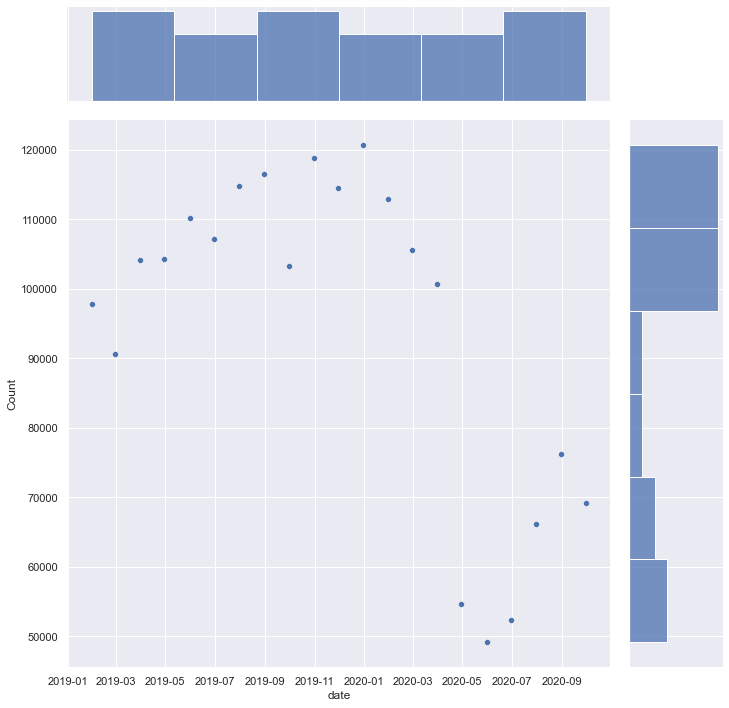

In [17]:
ax = sns.jointplot(data = df_bymonth, x = "date", y = "Count", height = 10)


*Figure 1*

#### *The daily flight volumes of passenger aircraft are plotted in red and cargo in yellow. Noticed the outlier point occurring just before 2019-10.*

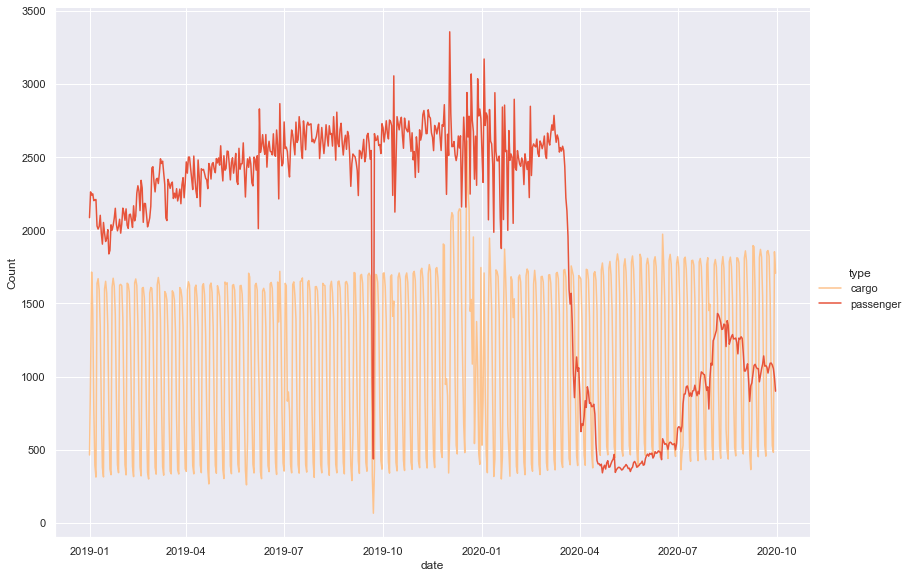

In [18]:
sns.set_style("darkgrid")
sns.set
ax = sns.relplot(data=dfma_total, x="date", y="Count", hue="type", kind="line", height=8, aspect=11.7/8.26, palette = "OrRd")


*Figure 2*

#### *We will identify and remove the outlier point(s) occuring just before 2019-10 in figure 2 and replot.*

In [19]:
#Highlight out of range row
dfx = dfma_total.set_index(['date'])
print(dfx.loc['2019-09-19':'2019-09-25'].to_string())


                 type  Count  callsign  typecode  origin  destination    7 Day Avg
date                                                                              
2019-09-19      cargo   1687      1687      1522    1229         1271  2154.000000
2019-09-19  passenger   2486      2486      2318    2007         2127  1819.714286
2019-09-20      cargo   1398      1398      1273     972         1045  1713.571429
2019-09-20  passenger   2545      2545      2395    2045         2202  1352.428571
2019-09-21      cargo    322       322       296     210          182  1173.857143
2019-09-21  passenger    963       963       896     615          652   872.000000
2019-09-22      cargo     66        66        58      10           64  1052.285714
2019-09-22  passenger    437       437       415     142          407   931.285714
2019-09-23      cargo    373       373       341     282          310  1258.571429
2019-09-23  passenger   2660      2660      2503    2149         2245  1363.000000
2019

In [23]:
dfma_totalf = dfma_total[(dfma_total['date'] <= '2019-09-20') | (dfma_total['date'] >= '2019-09-23')]
dfma_totalf.head()

date       type  Count  callsign  typecode  origin  destination  \
2 2019-01-01      cargo    464       464       441     322          260   
3 2019-01-01  passenger   2086      2086      1939    1561         1617   
4 2019-01-02      cargo   1016      1016       948     627          772   
5 2019-01-02  passenger   2262      2262      2130    1734         1776   
6 2019-01-03      cargo   1714      1714      1617    1196         1274   

     7 Day Avg  
2          NaN  
3  1122.857143  
4  1436.000000  
5  1605.428571  
6  1860.428571

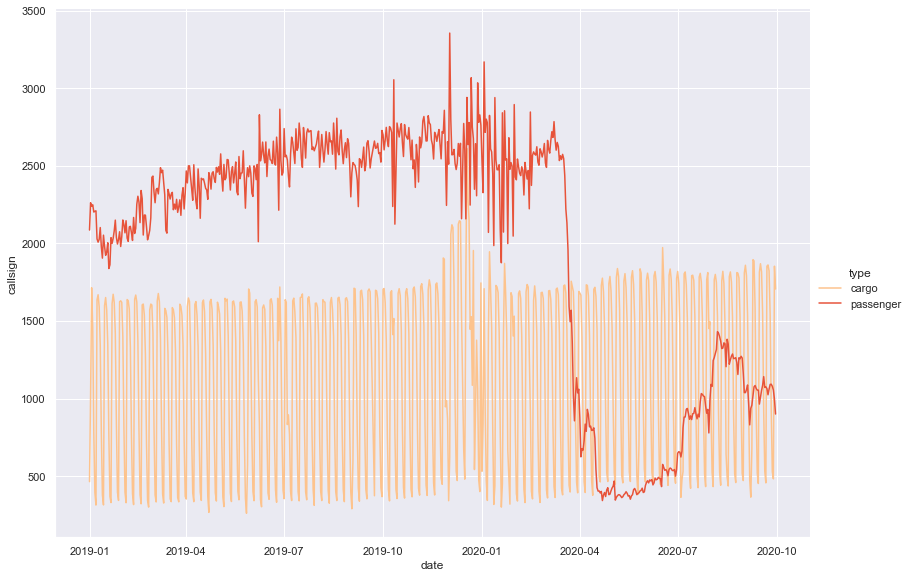

In [24]:
sns.set_style("darkgrid")
sns.set
ax = sns.relplot(data=dfma_totalf, x="date", y="callsign", hue="type", kind="line", height=8, aspect=11.7/8.26, palette = "OrRd")


*Figure 3*

#### *Let's now breakdown the data and do an overlay plot to compare the flights now to that of one year ago. Each number on the x-axis represents a month in the year.*

<AxesSubplot:xlabel='date'>

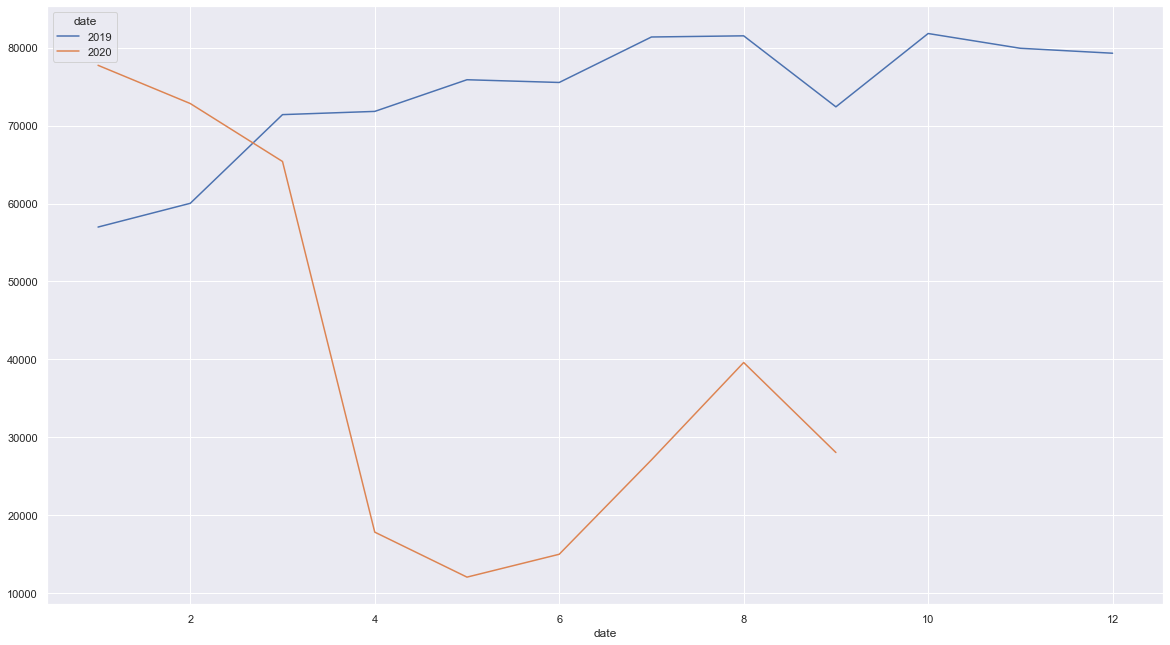

In [19]:
#Year 1 dates: 2019-01-03 to 2019-09-30
#Year 2 dates: 2020-01-01 to 2020-09-30

pv = pd.pivot_table(dfma_passenger, index = dfma_passenger.date.dt.month, columns = dfma_passenger.date.dt.year, values = 'Count', aggfunc = 'sum')
pv.plot()


*Figure 4*

## *Analysis*
+ From figure 1 it is clear that there are large fluctuations in flight volumes month-to-month and that the question of whether or not flights were significantly affected by the pandemic is worth investigating. Figure 3 shows an unprecedented drop in flight volumes in late March/early April, as this is when the COVID19 response began in many countries around the world. Passenger flight volumes stay relatively flat from April until June of 2020 and begin to increase around July. Although some recovery in passenger flights is seen, they have not returned to anywhere near pre-pandemic operating levels. This is evident from figure 4, which compares average passenger flight volumes from each month this year to last year.
+ Converesly cargo flight volumes have only continued to increase during the pandemic, as seen by the slow rise in the yellow line in figure 3.

## EDA 2

#### *For part two we will now use two different subsets of the original data, only for Lufthansa and Lufthansa Cargo airlines. We will explore how this company provides cargo and passenger services, both domestic and internationally. We will also show how airlines have responded to the COVID19 pandemic by reallocating their services, by examining the shift from passenger to cargo volumes.*

In [3]:
df2_passenger = pd.read_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/PartII_passenger.csv')
df2_passenger = df2_passenger.dropna(subset=['origin', 'destination'])
df2_passenger['type'] = 'passenger'

df2_cargo = pd.read_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/PartII_Cargo.csv')
df2_cargo = df2_cargo.dropna(subset=['origin', 'destination'])
df2_cargo['type'] = 'cargo'


#### *Now we will check that the data loaded and filtered properly.*

In [4]:
df2_passenger.head()

Unnamed: 0 callsign typecode origin destination                  firstseen  \
0          27   DLH716     A343   EDDF        RJTT  2020-07-31 12:42:23+00:00   
1         319   DLH778     A343   EDDF        WSSS  2020-07-31 19:27:25+00:00   
2         353   DLH506     B748   EDDF        SBGR  2020-07-31 19:44:23+00:00   
3         355   DLH573     B748   FAOR        EDDF  2020-07-31 19:45:45+00:00   
4         386   DLH796      NaN   EDDF        VHHH  2020-07-31 19:58:40+00:00   

   latitude_1  longitude_1  latitude_2  longitude_2       type  
0   50.038442     8.546936   35.478764   139.826563  passenger  
1   50.045723     8.566156    1.386465   104.009273  passenger  
2   50.046089     8.567746  -23.433512   -46.480509  passenger  
3  -26.197220    28.214342   50.041981     8.581768  passenger  
4   50.046426     8.570802   22.311584   113.899908  passenger

In [5]:
df2_cargo.head()

Unnamed: 0 callsign typecode origin destination                  firstseen  \
0          28  GEC8400     B77L   EDDF        RKSI  2020-07-31 12:52:48+00:00   
1         145  GEC8475     B77L   VHHH        EDDF  2020-07-31 16:57:33+00:00   
2         163  GEC8387     B77L   RKSI        EDDF  2020-07-31 17:18:50+00:00   
3         205  GEC8254     MD11   EDDF        SBKP  2020-07-31 18:02:42+00:00   
4         254  GEC8160     MD11   EDDF        KJFK  2020-07-31 18:46:20+00:00   

   latitude_1  longitude_1  latitude_2  longitude_2   type  
0   50.040916     8.546297   37.520416   126.408399  cargo  
1   22.301376   113.914140   50.041247     8.547493  cargo  
2   37.509659   126.412256   50.040618     8.544858  cargo  
3   50.040711     8.548031  -22.996247   -47.150116  cargo  
4   50.040013     8.545378   40.650671   -73.750596  cargo

#### *An external csv file containing airport iaco codes and cities is imported. This will be converted to a dictionary so it can be used to evaluate each of the flights to determine if it is international or domestic and this property will be appended to a new column*


In [6]:
df_airports = pd.read_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/external_sources/airport-codes.csv')
df_airports = df_airports[['ident', 'iso_country']]


In [7]:
iata_to_country = df_airports.set_index('ident').T.to_dict('list')


#### *Test the new dictionary. 'EDDF' is Frankfurt Airport, which correctly corresponds to 'DE'.*

In [8]:
iata_to_country['EDDF']


['DE']

#### *Use dictionary to map airport origin and destination iata codes to countries.*

In [9]:
df2_passenger['Departure Country'] = df2_passenger['origin'].map(iata_to_country)
df2_passenger['Arrival Country'] = df2_passenger['destination'].map(iata_to_country)

df2_cargo['Departure Country'] = df2_cargo['origin'].map(iata_to_country)
df2_cargo['Arrival Country'] = df2_cargo['destination'].map(iata_to_country)

df2_combined = pd.concat([df2_passenger, df2_cargo])
df2_combined.head()

Unnamed: 0 callsign typecode origin destination                  firstseen  \
0          27   DLH716     A343   EDDF        RJTT  2020-07-31 12:42:23+00:00   
1         319   DLH778     A343   EDDF        WSSS  2020-07-31 19:27:25+00:00   
2         353   DLH506     B748   EDDF        SBGR  2020-07-31 19:44:23+00:00   
3         355   DLH573     B748   FAOR        EDDF  2020-07-31 19:45:45+00:00   
4         386   DLH796      NaN   EDDF        VHHH  2020-07-31 19:58:40+00:00   

   latitude_1  longitude_1  latitude_2  longitude_2       type  \
0   50.038442     8.546936   35.478764   139.826563  passenger   
1   50.045723     8.566156    1.386465   104.009273  passenger   
2   50.046089     8.567746  -23.433512   -46.480509  passenger   
3  -26.197220    28.214342   50.041981     8.581768  passenger   
4   50.046426     8.570802   22.311584   113.899908  passenger   

  Departure Country Arrival Country  
0              [DE]            [JP]  
1              [DE]            [SG]  
2              [DE]            [BR]  
3              [ZA]            [DE]  
4              [DE]            [HK]

#### *Create a new column and assign a value of 1 if the flight is international and 0 if it is domestic.*

In [10]:
def is_international(df):
    df['Is International'] = np.where(df['Arrival Country'] == df['Departure Country'], 1, 0)
    return df

#### *In 'Is International' column change 1 to 'International' and 0 to 'Domestic for clarity.*


In [11]:
df2_passenger = is_international(df2_passenger)
df2_cargo = is_international(df2_cargo)
df2_combined = is_international(df2_combined)

df2_combined.head()

Unnamed: 0 callsign typecode origin destination                  firstseen  \
0          27   DLH716     A343   EDDF        RJTT  2020-07-31 12:42:23+00:00   
1         319   DLH778     A343   EDDF        WSSS  2020-07-31 19:27:25+00:00   
2         353   DLH506     B748   EDDF        SBGR  2020-07-31 19:44:23+00:00   
3         355   DLH573     B748   FAOR        EDDF  2020-07-31 19:45:45+00:00   
4         386   DLH796      NaN   EDDF        VHHH  2020-07-31 19:58:40+00:00   

   latitude_1  longitude_1  latitude_2  longitude_2       type  \
0   50.038442     8.546936   35.478764   139.826563  passenger   
1   50.045723     8.566156    1.386465   104.009273  passenger   
2   50.046089     8.567746  -23.433512   -46.480509  passenger   
3  -26.197220    28.214342   50.041981     8.581768  passenger   
4   50.046426     8.570802   22.311584   113.899908  passenger   

  Departure Country Arrival Country  Is International  
0              [DE]            [JP]                 0  
1              [DE]            [SG]                 0  
2              [DE]            [BR]                 0  
3              [ZA]            [DE]                 0  
4              [DE]            [HK]                 0

#### *This function changes the date strings into proper datetime format.*


In [12]:
def process_dates(df):
    #Filter for date and remove time from first and last seen categories
    df['firstseen'] = df['firstseen'].str.slice(stop=10)

    #Create datetime formatted column
    df['date'] = pd.to_datetime(df['firstseen'], format = '%Y-%m-%d')
    
    df.dropna(subset = ['date'])
    
    return df


In [19]:
df2_combined = process_dates(df2_combined)
df2_passenger = process_dates(df2_passenger)
df2_cargo = process_dates(df2_cargo)


df3_passenger = df2_passenger.groupby(['date', 'type', 'Is International']).count().reset_index()
df3_cargo = df2_cargo.groupby(['date', 'type', 'Is International']).count().reset_index()
df3_combined = df2_combined.groupby(['date', 'type', 'Is International']).count().reset_index()

df3_combined = df3_combined.iloc[3:]
df3_passenger = df3_passenger.iloc[3:]
df3_cargo = df3_cargo.iloc[3:]

In [20]:
df2_combined.head()

Unnamed: 0 callsign typecode origin destination   firstseen  latitude_1  \
0          27   DLH716     A343   EDDF        RJTT  2020-07-31   50.038442   
1         319   DLH778     A343   EDDF        WSSS  2020-07-31   50.045723   
2         353   DLH506     B748   EDDF        SBGR  2020-07-31   50.046089   
3         355   DLH573     B748   FAOR        EDDF  2020-07-31  -26.197220   
4         386   DLH796      NaN   EDDF        VHHH  2020-07-31   50.046426   

   longitude_1  latitude_2  longitude_2       type Departure Country  \
0     8.546936   35.478764   139.826563  passenger              [DE]   
1     8.566156    1.386465   104.009273  passenger              [DE]   
2     8.567746  -23.433512   -46.480509  passenger              [DE]   
3    28.214342   50.041981     8.581768  passenger              [ZA]   
4     8.570802   22.311584   113.899908  passenger              [DE]   

  Arrival Country  Is International       date  
0            [JP]                 0 2020-07-31  
1            [SG]                 0 2020-07-31  
2            [BR]                 0 2020-07-31  
3            [DE]                 0 2020-07-31  
4            [HK]                 0 2020-07-31

In [21]:
df2_passenger.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/oversized_data/pass_tableau_uncounted.csv')
df2_cargo.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/oversized_data/cargo_tableau_uncounted.csv')
df2_combined.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/oversized_data/total_tableau.csv')
df3_passenger.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/oversized_data/pass_tableau.csv')
df3_cargo.to_csv('/Users/luke/Documents/UBCO/Data_301/Course_Project/course-project-solo_325/data/raw/oversized_data/cargo_tableau.csv')



#### *Now we can create violin plots to show the distribution of flight volumes between domestic and international, between cargo and passenger flights.*
+ Note that the y-axis 'Unnamed: 0' is actually the count of flights.
+ 1 means an international flight and 0 a domestic one.

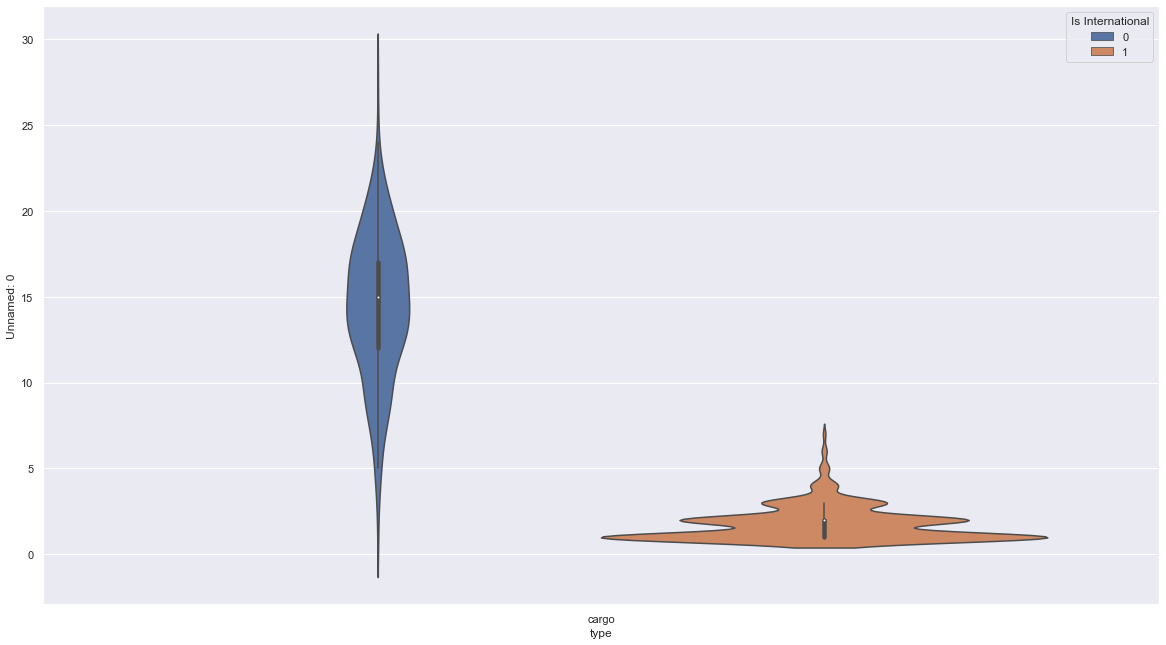

In [73]:
ax = sns.violinplot(x="type", y="Unnamed: 0", hue="Is International", data=df3_cargo)


*Figure 5*

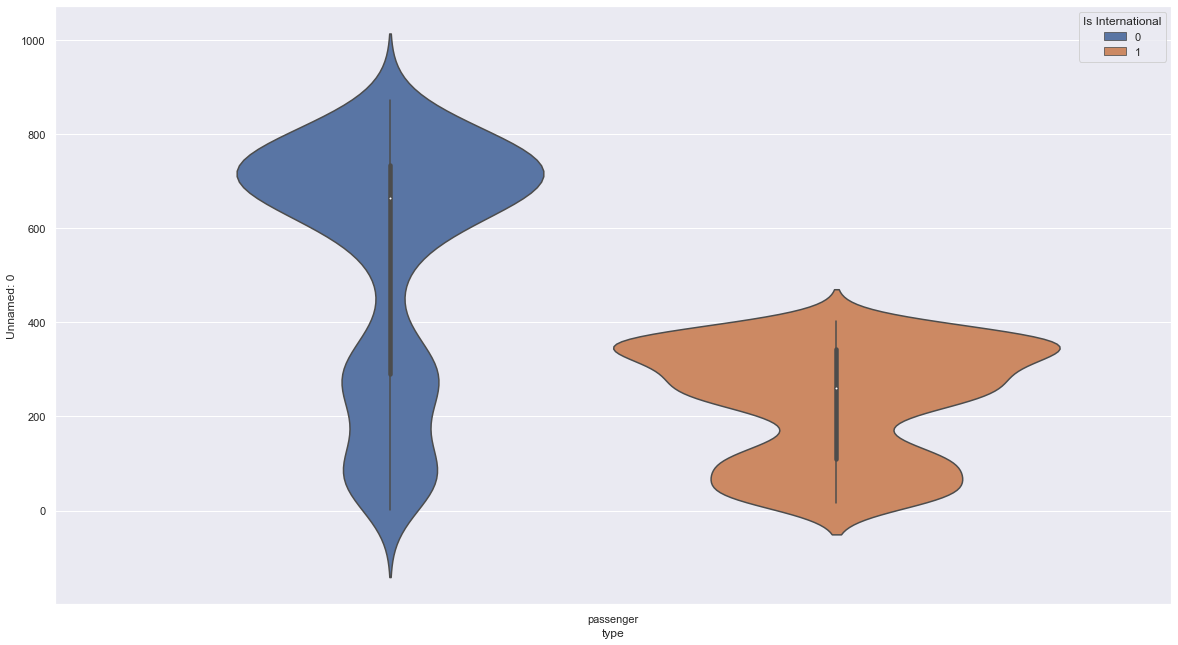

In [74]:
ax = sns.violinplot(x="type", y="Unnamed: 0", hue="Is International", data=df3_passenger)


*Figure 6*

<AxesSubplot:xlabel='date'>

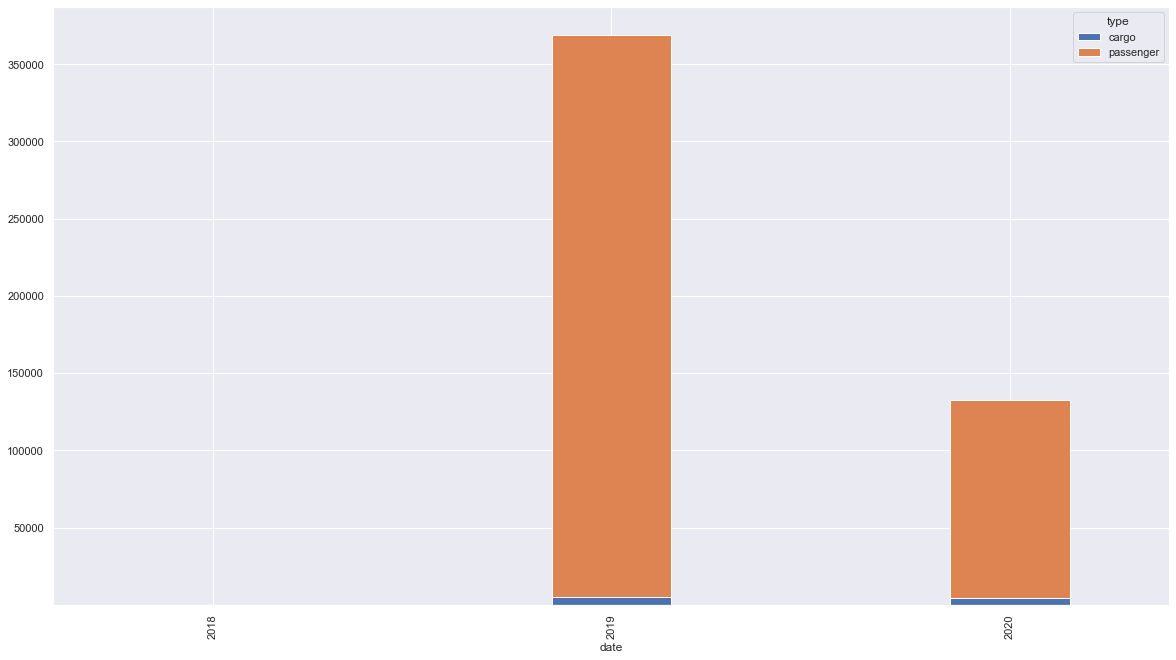

In [76]:
df2_combined.pivot_table(index=df2_combined.date.dt.year, columns='type', aggfunc='size').plot(kind='bar', stacked=True, width=0.3)


*Figure 7*

<AxesSubplot:xlabel='date'>

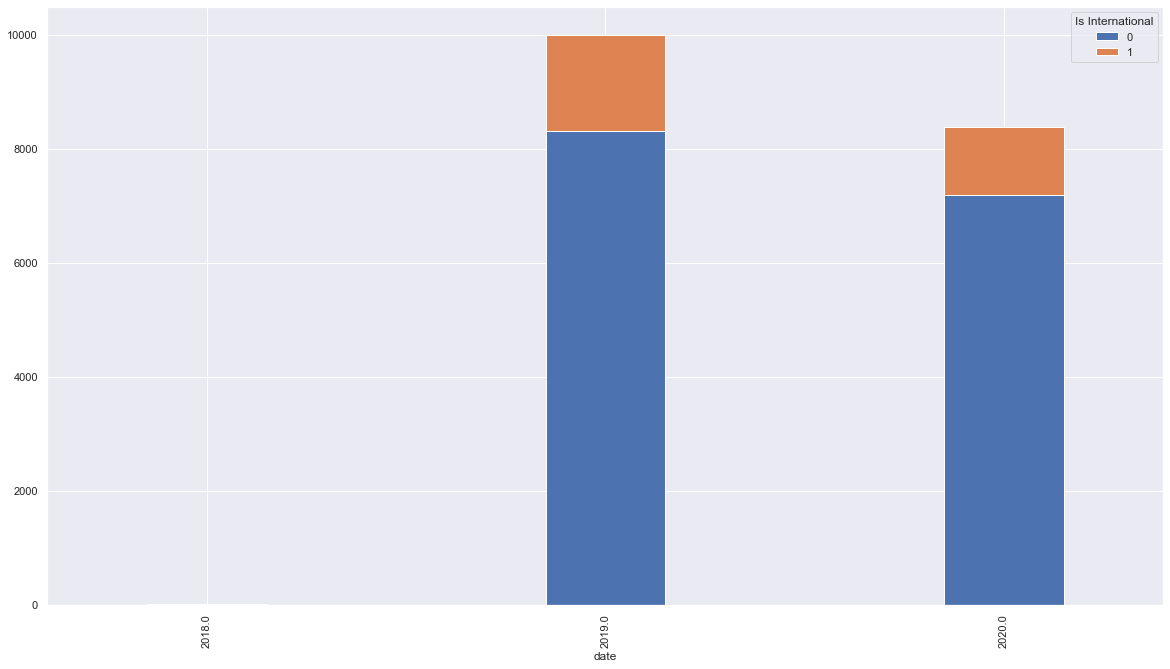

In [80]:
df2_combined.pivot_table(index=df2_cargo.date.dt.year, columns='Is International', aggfunc='size').plot(kind='bar', stacked=True, width=0.3)

*Figure 8*

<AxesSubplot:xlabel='date'>

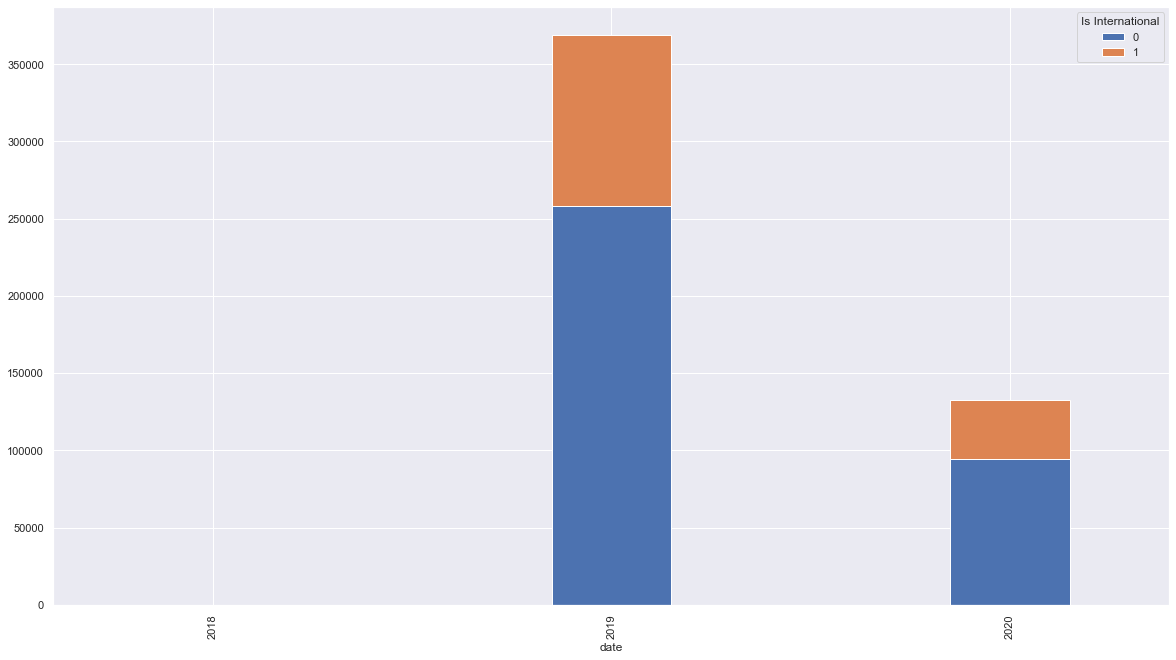

In [79]:
df2_combined.pivot_table(index=df2_combined.date.dt.year, columns='Is International', aggfunc='size').plot(kind='bar', stacked=True, width=0.3)


*Figure 9*

## *Analysis*
+ Plots 5 and 6 show the distribution of the daily flight volumes. 
+ It is clear from figure 5 that Lufthansa airways provides the majority of cargo flight services domestically, with a very low distribution of domestic cargo flights.  
+ Similar to cargo flights, Lufthansa passenger flights also have a higher overall distribution domestically, however the international passenger flights are not distributed near zero, like in the cargo case.
+ Relative to Lufthansa's passenger flight volumes, the cargo ones did not change significantly between 2019 and 2020. 
+ If we examine just the cargo flight volumes by year as seen in figure 8, we notice that they actually decreased slightly, which shows that this airline followed a different trend than the average cargo flight volumes between 2019 and 2020. 
+ By comparing figure 7 and 8 we see that a much higher volume of passenger flights was lost than cargo ones.


## *Conclusion*
+ For the airlines used in EDA 1, the daily flight volumes of passenger aircraft dropped rapidly with the COVID19 response and have not returned to anywhere near normal to date.
+ During this same time frame, cargo flights continued to linearly increase.
+ Lufthansa airlines was found to provide the majority of it's cargo services domestically. It also provides a higher proportion of domestic passenger flights than international ones.
+ Lufthansa was found to have a decrease in both cargo and passenger flights, however the cargo flight decrease was minimal compared to the passenger one.